# Практическая работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 0382 Прибылов Никита и Морева Елена. Вариант №15.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования. 

## Основные теоретические положения

**Дискретный единичный скачок** — дискретный аналог функции единичного скачка: 

$$\sigma_d(k) = \begin{cases}1, & k\geq0,\\ 0,& k < 0.\end{cases}, \quad k \in \mathbb{Z}$$

**Дискретный прямоугольный импульс**:

$$s_1(k) = 
\begin{cases}
U, & n_0 \leq k \leq n_0 + n_{imp} - 1,\\
0, & иначе
\end{cases}$$ 

**Дискретный гармонический сигнал**: $$s(k) = C\cos(\hat\omega_0 k)$$

**Среднее значение дискретного сигнала**: $$mean = \frac{1}{N} \sum_{k=0}^{N}x(k)$$

**Энергия дискретного сигнала**: $$E = \sum_{k=0}^{N}(x(k))^2$$

**Средняя мощность дискретного сигнала**: $$P = \frac{E}{N} = \frac{1}{N} \sum_{n=0}^{N}(x(k))^2$$

**Линейная комбинация** - выражение, равное сумме произведений элементов множества (векторов, функций и т.д.) на некоторые коэффициенты.

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами. 

## Выполнение работы

Инициализация начальных значений:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Nb = 15
N = 30 + Nb % 5
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
omega_0 = np.pi / (6 + Nb % 5)
U = Nb
n0 = 3 + Nb % 5
n_imp = 5 + Nb % 5
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5
omega_1 = np.pi / (4 + Nb % 5)
omega_2 = np.pi / (8 + Nb % 5)
omega_3 = np.pi / (16 + Nb % 5)
a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5

print(f'{Nb=}\n{N=}\n{a=}\n{C=}\n{omega_0=}\n{U=}\n{n0=}\n{n_imp=}\n{B1=}\n{B2=}\n{B3=}\n'\
      f'{omega_1=}\n{omega_2=}\n{omega_3=}\n{a1=}\n{a2=}\n{a3=}')

Nb=15
N=30
a=-0.875
C=1
omega_0=0.5235987755982988
U=15
n0=3
n_imp=5
B1=1.5
B2=5.7
B3=2.2
omega_1=0.7853981633974483
omega_2=0.39269908169872414
omega_3=0.19634954084936207
a1=1.5
a2=0.7
a3=1.4


Вспомогательная функция отрисовки графиков:

In [2]:
def plot(x, y, size=(15, 5), title='', xlabel='', ylabel=''):
    plt.figure(figsize=size)
    plt.stem(x, y)
    plt.grid()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

**Задание 1**

Был смоделирован дискретный прямоугольный импульс 

$$s_1(k) = 
\begin{cases}
U, & n_0 \leq k \leq n_0 + n_{imp} - 1,\\
0, & иначе
\end{cases}$$ 

на основе дискретного единичного скачка $\sigma_d(k)$ на интервале времени $n \in [0, N-1]$. 

Прямоугольный импульс можно смоделировать путём комбинации двух единичных скачков - одного со сдвигом, равным левой границе импульса, и второго со сдвигом, равным правой границе, и взятого с противоположным знаком:

$$s_1(k) = U \cdot \sigma_d(k - n_0) \cdot (1 - \sigma_d(k - (n_0 + n_{imp}))$$


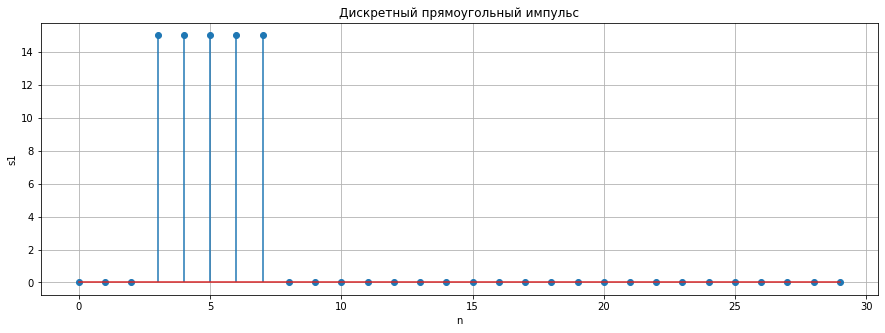

In [3]:
sigma_d = np.vectorize(lambda k: 1 if k >= 0 else 0)
s1 = lambda k: U * sigma_d(k - n0) * (1 - sigma_d(k - (n0 + n_imp)))

X = np.arange(N)
Y = s1(X)

plot(X, Y, title='Дискретный прямоугольный импульс', xlabel='n', ylabel='s1')


**Задание 2**

Была смоделирована линейная комбинация дискретных гармонических сигналов $s_2(k)$:

$$s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k), $$ где $$x_i(k) = B_i \sin(\hat\omega_i k)$$

на интервале времени $n \in [0, 5N-1]$. 

Последовательность формируется взятием линейной комбинации значений $x_1, x_2, x_3$ на каждом отсчёте с коэффициентами соответственно $a_1, a_2, a_3$ по всему промежутку.

Для полученной последовательности можно вычислить некоторые характеристики:

Среднее значение $mean$ - среднее от значений отсчётов на промежутке.

Энергия $E$ - сумма квадратов значений отсчётов на промежутке.

Средняя мощность $P$ - среднее от квадратов значений отсчётов на промежутке.

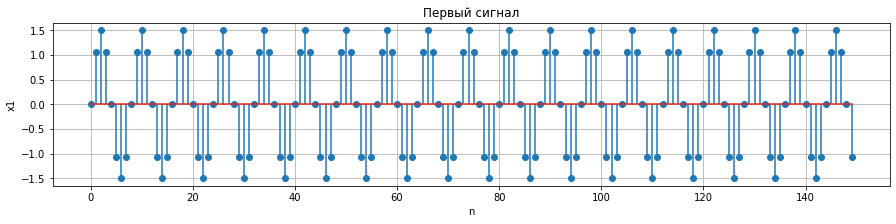

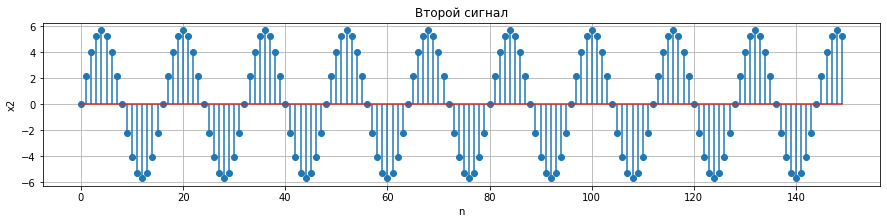

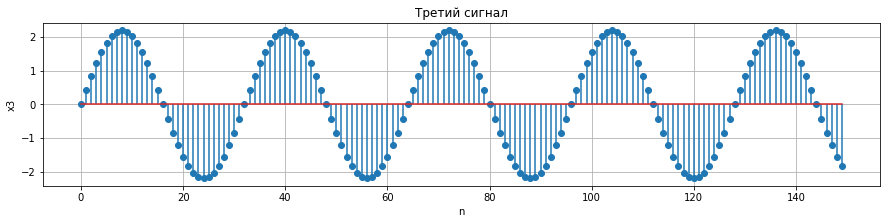

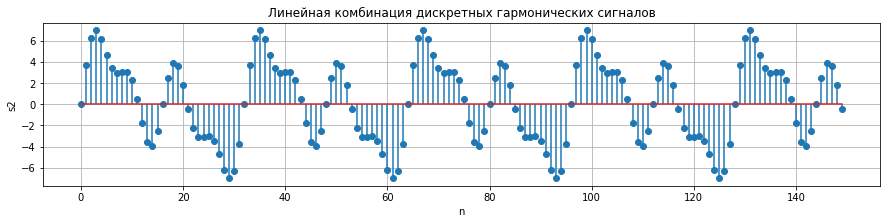

Среднее значение: mean_s2=0.28396041266583466
Энергия: E=2231.4741570344095
Средняя мощность: P=14.876494380229396


In [4]:
x1 = lambda k: B1 * np.sin(omega_1 * k)
x2 = lambda k: B2 * np.sin(omega_2 * k)
x3 = lambda k: B3 * np.sin(omega_3 * k)
s2 = lambda k: a1*x1(k) + a2*x2(k) + a3*x3(k)

size = (15, 3)
X = np.arange(5*N)
Y = x1(X)
plot(X, Y, size=size, title='Первый сигнал', xlabel='n', ylabel='x1')

Y = x2(X)
plot(X, Y, size=size, title='Второй сигнал', xlabel='n', ylabel='x2')

Y = x3(X)
plot(X, Y, size=size, title='Третий сигнал', xlabel='n', ylabel='x3')

Y = s2(X)
plot(X, Y, size=size, title='Линейная комбинация дискретных гармонических сигналов', xlabel='n', ylabel='s2')

mean_s2 = np.mean(Y)
E = np.sum(Y**2)
P = E / len(Y)
print(f'Среднее значение: {mean_s2=}\nЭнергия: {E=}\nСредняя мощность: {P=}')


**Задание 3**

Была выведен график дискретного сигнала $s_3(k)$, представляющего собой дискретный гармонический сигнал $s(k)$:

$$s(k) = C\cos(\hat\omega_0 k)$$

с экспоненциальной огибающей $|a|^k$, на интервале времени $n \in [0, N-1]$. 

Дискретный сигнал $s_3(k)$ можно записать в виде произведения гармонического сигнала и огибающей:

$$s_3(k) = |a|^k \cdot C\cos(\hat\omega_0 k)$$

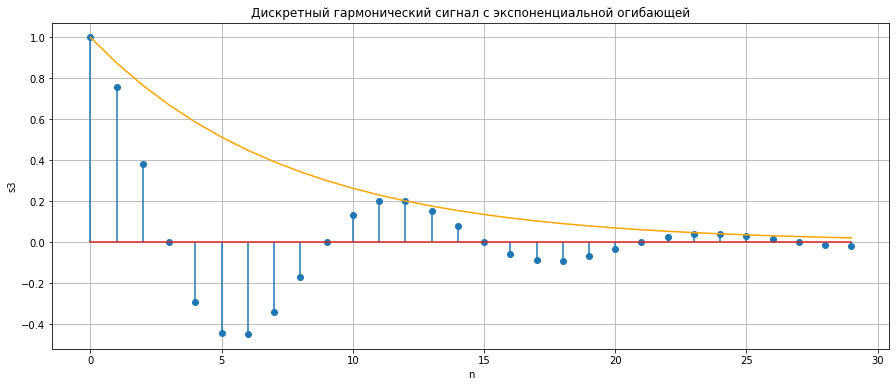

In [5]:
s = lambda k: C * np.cos(omega_0 * k)
s3 = lambda k: s(k) * np.abs(a)**k

X = np.arange(N)
Y1 = s3(X)
Y2 = np.abs(a)**X

plt.figure(figsize=(15, 6))
plt.stem(X, Y1)
plt.plot(X, Y2, color='orange')
plt.grid()
plt.title('Дискретный гармонический сигнал с экспоненциальной огибающей')
plt.xlabel('n')
plt.ylabel('s3')
plt.show()


**Задание 4**

Был выведен график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом $T$, вдвое большим длительности импульса.

Последовательность можно получить, просуммировав пять прямоугольных импульсов с задержкой на $T\cdot i$, где $i$ - номер очередного импульса.


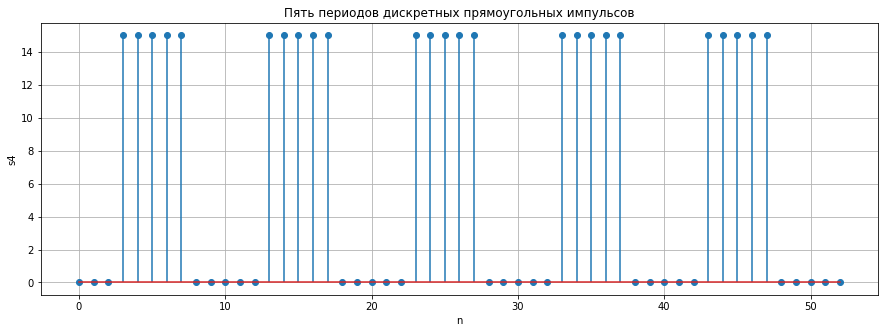

In [6]:
s4 = lambda k, T, n: np.sum([s1(k-T*i) for i in range(n)], axis=0)
T = 2 * n_imp
times = 5

length = n0 + T * (times)
X = np.arange(length)
Y = s4(X, T, times)

plot(X, Y, title='Пять периодов дискретных прямоугольных импульсов', xlabel='n', ylabel='s4')


## Выводы

В ходе работы были смоделированы дискретный прямоугольный импульс с помощью комбинации двух дискретных единичных скачков, линейная комбинация дискретных гармонических сигналов (а также были вычислены некоторые характеристики результирующей последовательности), дискретный гармонический сигнал с экспоненциальной огибающей и периодический дискретный прямоугольный импульс, полученный комбинацией прямоугольных импульсов с разной задержкой. Для каждого сигнала были приведены их графики.